In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


df_crime = pd.read_csv('clean_data.csv')
df_crime = df_crime.drop('DR_NO', axis=1)


## KMeans

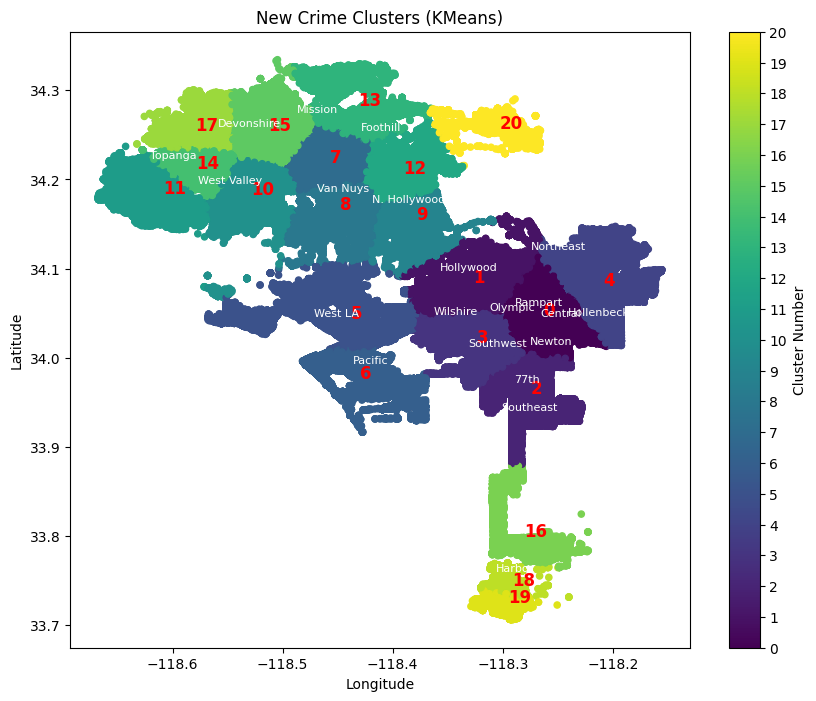

In [5]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.colors import ListedColormap

# Assuming df_crime['LON'] and df_crime['LAT'] are your longitude and latitude data
coords = np.column_stack((df_crime['LON'], df_crime['LAT']))

# Define initial centroids as coordinates of police stations
station_coords = {
    "Central": (34.04411080306554, -118.24748306155207),
    "77th": (33.97037817485058, -118.27796869999999),
    "Southwest": (34.010194018412385, -118.30497240388196),
    "Pacific": (33.99169172013332, -118.41986776900023),
    "Hollywood": (34.09580875431208, -118.33084255471671),
    "Southeast": (33.93854705722783, -118.27542700471099),
    "Olympic": (34.05039813056319, -118.29114073429325),
    "N. Hollywood": (34.17177340492995, -118.3857370001728),
    "Wilshire": (34.046614144300634, -118.34263238662076),
    "Newton": (34.01245114514639, -118.25626651967428),
    "Topanga": (34.22137305584511, -118.59932167541463),
    "Rampart": (34.056744454029186, -118.26707559456186),
    "West LA": (34.04384233779523, -118.45088588971068),
    "Van Nuys": (34.18380155311523, -118.4449382748191),
    "West Valley": (34.19353939842985, -118.54767086952694),
    "Mission": (34.27336284901255, -118.46859495529038),
    "Northeast": (34.11921601294294, -118.2493705313661),
    "Devonshire": (34.256815467332956, -118.53044812398777),
    "Harbor": (33.75764921706162, -118.28914932140042),
    "Hollenbeck": (34.044762711360995, -118.21294130033142),
    "Foothill": (34.25312609672471, -118.41042120698145)
}

initial_centroids = np.array([coord for coord in station_coords.values()])

# Perform K-means clustering with custom initial centroids
kmeans = KMeans(n_clusters=21, init=initial_centroids, random_state=583)
kmeans.fit(coords)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Calculate the density of each cluster
cluster_counts = np.bincount(cluster_labels)
cluster_density = cluster_counts / cluster_counts.sum()

# Sort clusters based on density
cluster_rank = np.argsort(cluster_density)[::-1]

# Reorder cluster labels according to density rank
cluster_labels_reordered = np.zeros_like(cluster_labels)
for i, rank in enumerate(cluster_rank):
    cluster_labels_reordered[cluster_labels == rank] = i

# Scatter plot with cluster labels and centers
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
scatter = plt.scatter(df_crime['LON'], df_crime['LAT'], c=cluster_labels_reordered, cmap="viridis", s=20)

# Annotate the most dense cluster with 0, then sequentially number the clusters based on density
for i, center in enumerate(cluster_centers[cluster_rank]):
    plt.annotate(f'{str(i)}', center, fontsize=12, color='red', weight='bold')

# Plot LAPD station names
for station, coord in station_coords.items():
    plt.text(coord[1], coord[0], station, fontsize=8, color='white', ha='center', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New Crime Clusters (KMeans)')

# Define a custom color map with the number of clusters
custom_cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 21)))  # 21 is the number of clusters

cbar = plt.colorbar(scatter, ticks=np.arange(21))
cbar.set_label('Cluster Number')
cbar.set_ticklabels(np.arange(21))


plt.show()


In [6]:
df_kmeans_clusts = pd.DataFrame({"Density Value": cluster_density[cluster_rank]})

df_kmeans_clusts.reset_index(drop=False, inplace=True)
df_kmeans_clusts.rename(columns={'index': 'Cluster Rank'}, inplace=True)

df_kmeans_clusts

,Cluster Rank,Density Value
0,0,0.178524
1,1,0.126187
2,2,0.111095
3,3,0.094406
4,4,0.054518
5,5,0.053017
6,6,0.045476
7,7,0.043438
8,8,0.035199
9,9,0.034086


In [7]:
# Predict cluster labels for each data point
nearest_cluster_labels = kmeans.predict(coords)

cluster_area_mapping = {
    0: "NEW_Devonshire",
    1: "NEW_East_Valley",
    2: "NEW_North_VanNuys",
    3: "NEW_Topanga",
    4: "NEW_Middle_Harbor",
    5: "NEW_West_Devonshire",
    6: "NEW_South_VanNuys",
    7: "NEW_North_Hollywood",
    8: "NEW_South_Harbor",
    9: "NEW_East_Foothill",
    10: "NEW_West_LA",
    11: "NEW_77th",
    12: "NEW_Pacific",
    13: "NEW_Southwest",
    14: "NEW_East_Central",
    15: "NEW_Central",
    16: "NEW_North_Harbor",
    17: "NEW_West_Valley",
    18: "NEW_Hollywood",
    19: "NEW_Mission",
    20: "NEW_South_Foothill",
}


df_crime['Kmeans Zones'] = np.vectorize(cluster_area_mapping.get)(nearest_cluster_labels)

df_crime['Kmeans Zones']


0                NEW_Central
1              NEW_Southwest
2          NEW_South_VanNuys
3              NEW_Hollywood
4                   NEW_77th
                 ...        
666837         NEW_Hollywood
666838     NEW_North_VanNuys
666839    NEW_South_Foothill
666840           NEW_Mission
666841         NEW_Hollywood
Name: Kmeans Zones, Length: 666842, dtype: object

In [8]:
df_crime

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Premis Desc,Status Desc,Crm Cd 1,LOCATION,LAT,LON,TIME_OCCURRENCE,Year,Month,Kmeans Zones
0,2020-02-09,2020-02-08,1800,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,...,BUS STOP/LAYOVER (ALSO QUERY 124),Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,1900-01-01 18:00:00,2020,2,NEW_Central
1,2020-11-11,2020-11-04,1700,Southwest,356,480,BIKE - STOLEN,19,X,X,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,1900-01-01 17:00:00,2020,11,NEW_Southwest
2,2023-05-10,2020-03-10,2037,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,...,CLOTHING STORE,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,1900-01-01 20:37:00,2020,3,NEW_South_VanNuys
3,2022-08-18,2020-08-17,1200,Hollywood,666,354,THEFT OF IDENTITY,28,M,H,...,SIDEWALK,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,1900-01-01 12:00:00,2020,8,NEW_Hollywood
4,2023-04-04,2020-12-01,2300,Southeast,1826,354,THEFT OF IDENTITY,41,M,H,...,SINGLE FAMILY DWELLING,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463,1900-01-01 23:00:00,2020,12,NEW_77th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666837,2024-01-30,2024-01-29,2330,Wilshire,723,410,"BURGLARY FROM VEHICLE, ATTEMPTED",59,M,W,...,STREET,Invest Cont,410.0,100 S LA JOLLA AV,34.0743,-118.3680,1900-01-01 23:30:00,2024,1,NEW_Hollywood
666838,2024-01-31,2024-01-30,2230,Van Nuys,901,330,BURGLARY FROM VEHICLE,36,M,W,...,PARKING LOT,Invest Cont,330.0,15300 SHERMAN WY,34.2012,-118.4725,1900-01-01 22:30:00,2024,1,NEW_North_VanNuys
666839,2024-01-14,2024-01-13,720,Foothill,1673,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,H,...,STREET,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878,1900-01-01 07:20:00,2024,1,NEW_South_Foothill
666840,2024-01-08,2024-01-08,800,Foothill,1601,625,OTHER ASSAULT,42,F,H,...,STREET,Invest Cont,625.0,VAUGHN ST,34.2865,-118.4161,1900-01-01 08:00:00,2024,1,NEW_Mission
